##Handwritten Digit Recognition

Importing the Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the Dataset into training and test set

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Looking at the training samples

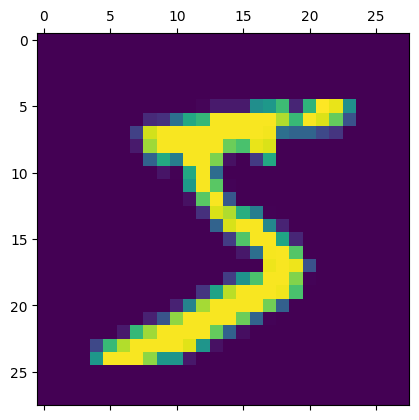

In [3]:
plt.matshow(X_train[0])

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

In [6]:
X_train.shape

(60000, 28, 28)

Scaling the features

In [7]:
X_train=X_train/255
X_test= X_test/255

Reshaping the features

In [8]:
X_train_flat= X_train.reshape(len(X_train),28*28)
X_test_flat= X_test.reshape(len(X_test),28*28)
X_train_flat.shape

(60000, 784)

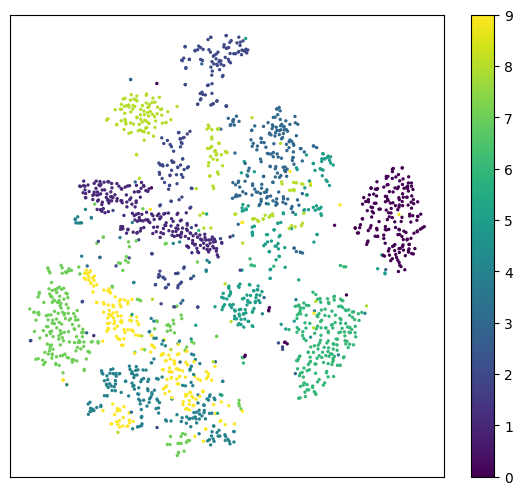

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_train_flat[:2000])
plt.figure(figsize=(7, 6))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y_train[:2000], s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

Specifying the Model

In [10]:
model=Sequential([
    Dense(25,activation='relu'),
    Dense(15,activation='relu'),
    Dense(10,activation='softmax')
])

Compiling the Model

In [11]:

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

Training the Model

In [12]:
tr_history=model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3986 - accuracy: 0.8866
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2043 - accuracy: 0.9406
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1634 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9583
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9628
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9650
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1018 - accuracy: 0.9686
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9706
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9723
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.084

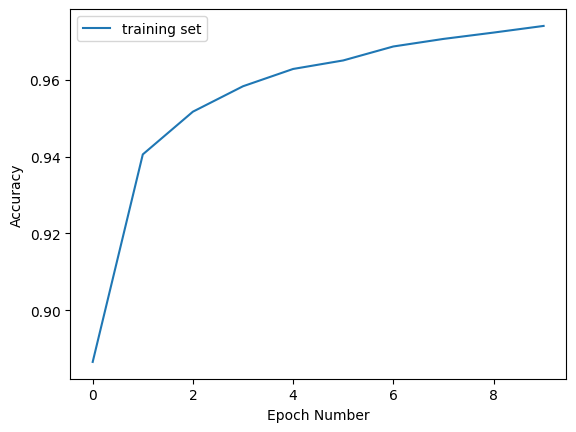

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(tr_history.history['accuracy'], label='training set')
plt.legend()

Evaluating the Model on test set

In [14]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1206 - accuracy: 0.9642


[0.12055301666259766, 0.9642000198364258]

Making Predictions

In [15]:
y_predicted=model.predict(X_test_flat)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([3.2323430e-10, 2.2183897e-08, 1.6304928e-06, 3.0561682e-04,
       1.0398602e-10, 2.4762980e-05, 3.7027992e-13, 9.9966276e-01,
       5.6848677e-07, 4.5864954e-06], dtype=float32)

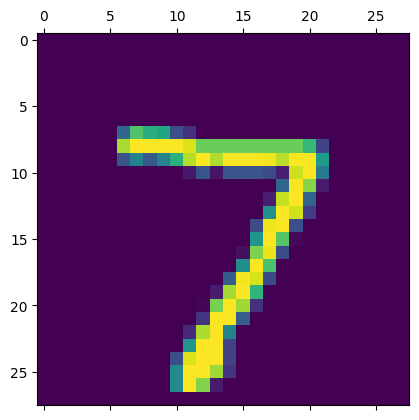

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

Forming Confusion Matrix

In [19]:
cm = confusion_matrix(y_test, y_predicted_labels)
print(cm)

[[ 966    0    0    1    1    2    2    2    4    2]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   3    6  990   14    3    0    3    8    5    0]
 [   0    0    4  986    0    2    0    8    5    5]
 [   1    0    6    2  959    0    5    5    0    4]
 [   4    0    0   16    4  855    8    1    2    2]
 [   9    3    2    0    6    5  929    1    3    0]
 [   1    7   12    3    5    1    0  992    1    6]
 [   5    5    5   11    6   10    5    9  914    4]
 [   3    6    0   12   30    5    1   20    6  926]]


Text(95.72222222222221, 0.5, 'Truth')

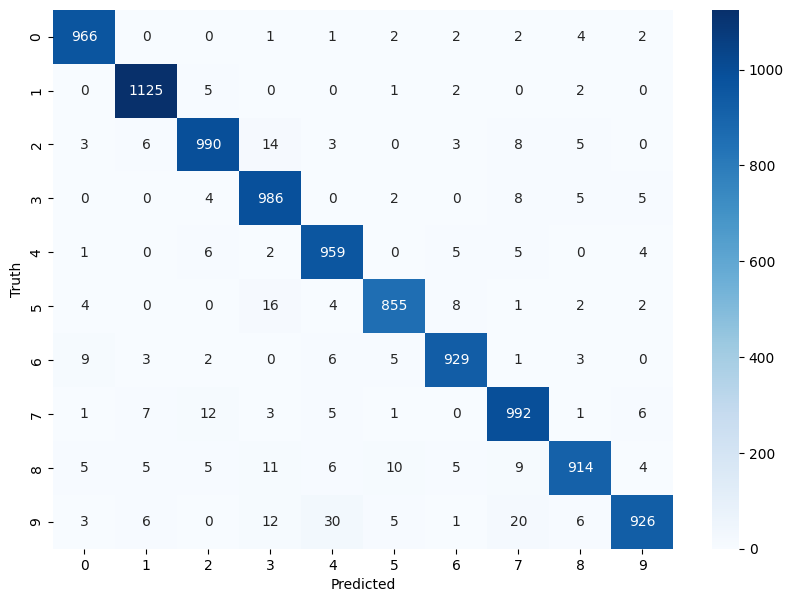

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Calculating Accuracy

In [22]:
accuracy=accuracy_score(y_test, y_predicted_labels)
print(f"Test Accuracy: {accuracy*100}%")

Test Accuracy: 96.41999999999999%
